In [1]:
# 1Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. 
#This should be the merged version of your data that contains the new customers column.

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\wsaha\Documents\Insta basket analysis'

In [3]:
ords_prods_merge_customer= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'ords_prods_merge_customer_sample.pkl'))

In [4]:
ords_prods_merge_customer.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_the _order_made,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First_Name,Last_Name,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,_merge
0,2721012,129081,18,2,15,8.0,21573,5,1,Roasted Pine Nut Hummus,...,Scott,Webster,Male,Wyoming,26,8/14/2019,2,married,5227,both
1,2721012,129081,18,2,15,8.0,1117,4,1,Turkey Bacon,...,Scott,Webster,Male,Wyoming,26,8/14/2019,2,married,5227,both
2,749483,129081,5,4,12,3.0,28413,4,1,Bunny-Luv Organic Carrots,...,Scott,Webster,Male,Wyoming,26,8/14/2019,2,married,5227,both
3,12893,129081,12,0,20,6.0,31759,11,0,Cherrios Honey Nut,...,Scott,Webster,Male,Wyoming,26,8/14/2019,2,married,5227,both
4,749483,129081,5,4,12,3.0,42629,10,1,Original Dried Cranberries,...,Scott,Webster,Male,Wyoming,26,8/14/2019,2,married,5227,both


In [5]:
ords_prods_merge_customer.shape

(10801619, 34)

In [6]:
# 2 Consider any security implications that might exist for this new data. 
# You’ll need to address any PII data in the data before continuing your analysis.

### Exclude First and ast name for PII

# Drop collumns

ords_prods_merge_customer = ords_prods_merge_customer.drop(columns = ['First_Name', 'Last_Name'])

In [7]:
ords_prods_merge_customer 

,order_id,user_id,order_number,orders_day_of_week,hour_of_the _order_made,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_order_frequency,order_frequency_flag,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,_merge
0,2721012,129081,18,2,15,8.0,21573,5,1,Roasted Pine Nut Hummus,...,7.0,Frequent customer,Male,Wyoming,26,8/14/2019,2,married,5227,both
1,2721012,129081,18,2,15,8.0,1117,4,1,Turkey Bacon,...,7.0,Frequent customer,Male,Wyoming,26,8/14/2019,2,married,5227,both
2,749483,129081,5,4,12,3.0,28413,4,1,Bunny-Luv Organic Carrots,...,7.0,Frequent customer,Male,Wyoming,26,8/14/2019,2,married,5227,both
3,12893,129081,12,0,20,6.0,31759,11,0,Cherrios Honey Nut,...,7.0,Frequent customer,Male,Wyoming,26,8/14/2019,2,married,5227,both
4,749483,129081,5,4,12,3.0,42629,10,1,Original Dried Cranberries,...,7.0,Frequent customer,Male,Wyoming,26,8/14/2019,2,married,5227,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801614,2295149,103043,1,3,6,NaN,44368,1,0,Fresh Mozzarella Cheese,...,28.0,Non-frequent customer,Male,Nevada,41,10/26/2018,0,single,-21717,both
10801615,2678993,162923,4,6,15,15.0,47865,4,0,Quart Storage Bags,...,15.0,Regular customer,Female,North Dakota,18,12/3/2017,1,living with parents and siblings,3152,both
10801616,2646942,45050,1,5,15,NaN,5449,1,0,Margherita Pizza,...,30.0,Non-frequent customer,Female,Kansas,78,12/21/2019,3,married,26676,both
10801617,3144111,112490,1,4,11,NaN,9076,1,0,Blueberries,...,10.0,Frequent customer,Male,Michigan,38,7/18/2017,2,married,-16622,both


In [8]:
# 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. 
# Create a regional segmentation of the data. 

## Creatng for loop

result = []

for value in ords_prods_merge_customer['State']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
                 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota' , 'South Dakota', 'Nebraska', 
                   'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
                   'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')
    else:
        result.append('Unknown') 

In [9]:
result

['West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 '

In [10]:
## Making region collumn with result list

ords_prods_merge_customer['Region'] = result

In [11]:
ords_prods_merge_customer['Region'].value_counts(dropna = False)

Region
South        3597960
West         2763516
Midwest      2532939
Northeast    1907204
Name: count, dtype: int64

In [12]:
ords_prods_merge_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10801619 entries, 0 to 10801618
Data columns (total 33 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   order_id                 object  
 1   user_id                  object  
 2   order_number             int32   
 3   orders_day_of_week       int8    
 4   hour_of_the _order_made  int8    
 5   days_since_prior_order   float64 
 6   product_id               int64   
 7   add_to_cart_order        int16   
 8   reordered                int32   
 9   product_name             object  
 10  aisle_id                 int8    
 11  department_id            int8    
 12  prices                   float64 
 13  merge_indicator          category
 14  price_range_loc          object  
 15  Bussiest_day             object  
 16  busiest_days             object  
 17  busiest_period_of_day    object  
 18  max_order                int64   
 19  loyalty_flag             object  
 20  mean_spend            

In [13]:
ords_prods_merge_customer['income'] = ords_prods_merge_customer['income'].astype('int32')

In [14]:
## Creating pivot table to show spending patterns of regions

Spending_pat = ords_prods_merge_customer.pivot_table(index='Region', columns='spending_flag', values='order_number', aggfunc='count', fill_value=0)

In [15]:
Spending_pat

spending_flag,High spender,Low spender
Region,,
Midwest,52073,2480866
Northeast,36032,1871172
South,70027,3527933
West,53372,2710144


In [16]:
### Checking the different accross states spendings through calculating as percentage of total

percentage = Spending_pat.div(Spending_pat.sum(axis=1), axis=0) * 100

In [17]:
percentage

spending_flag,High spender,Low spender
Region,,
Midwest,2.055833,97.944167
Northeast,1.889258,98.110742
South,1.946297,98.053703
West,1.931308,98.068692


In [18]:
### This indicates that there is minimum difference in spending patterns in regions. However there is a tiny higher  % in Midwest



Text(0.5, 1.0, ' High & Low Spender percentage by Region')

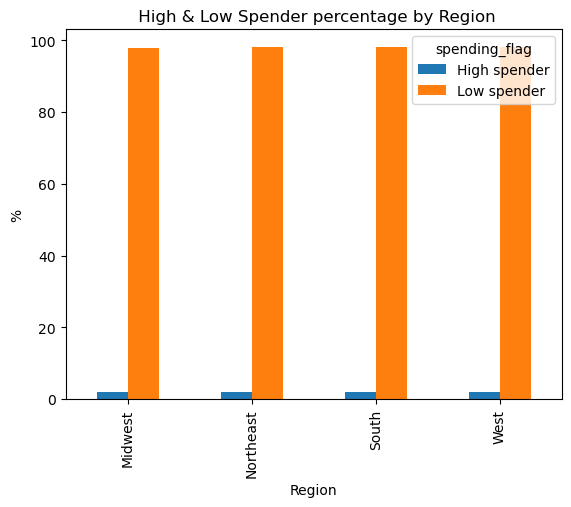

In [19]:
## Create bar chart for visualization

percentage.plot.bar()
plt.xlabel('Region')
plt.ylabel('%')
plt.title(' High & Low Spender percentage by Region')


In [20]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'High & Low Spender percentage by Region.png'))

<Figure size 640x480 with 0 Axes>

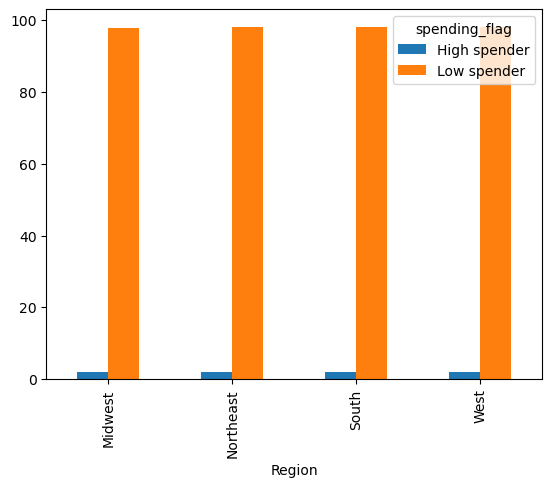

In [21]:
# Export bar

percentage.plot.bar().figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'High & Low Spender percentage by Region.png'))

In [22]:
## 4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app.
##  Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
##Make sure you export this sample.

# Creting exclusion flag

ords_prods_merge_customer['exclusion_flag'] = np.where(ords_prods_merge_customer['max_order'] < 5, 'Yes', 'No')

In [23]:
ords_prods_merge_customer.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_the _order_made,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,_merge,Region,exclusion_flag
0,2721012,129081,18,2,15,8.0,21573,5,1,Roasted Pine Nut Hummus,...,Male,Wyoming,26,8/14/2019,2,married,5227,both,West,No
1,2721012,129081,18,2,15,8.0,1117,4,1,Turkey Bacon,...,Male,Wyoming,26,8/14/2019,2,married,5227,both,West,No
2,749483,129081,5,4,12,3.0,28413,4,1,Bunny-Luv Organic Carrots,...,Male,Wyoming,26,8/14/2019,2,married,5227,both,West,No
3,12893,129081,12,0,20,6.0,31759,11,0,Cherrios Honey Nut,...,Male,Wyoming,26,8/14/2019,2,married,5227,both,West,No
4,749483,129081,5,4,12,3.0,42629,10,1,Original Dried Cranberries,...,Male,Wyoming,26,8/14/2019,2,married,5227,both,West,No


In [24]:
## Defining lowactive customers 

Low_act = ords_prods_merge_customer[ords_prods_merge_customer['exclusion_flag'] == 'Yes']

In [25]:
Low_act.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_the _order_made,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,_merge,Region,exclusion_flag
3913,3229583,153461,3,6,11,12.0,8277,11,0,Apple Honeycrisp Organic,...,Male,Alaska,45,6/20/2018,0,single,-32596,both,West,Yes
3914,2427993,153461,1,2,14,NaN,8294,2,0,"Juice Blend, Organic Vegetable, Beets",...,Male,Alaska,45,6/20/2018,0,single,-32596,both,West,Yes
3915,1622880,153461,2,1,16,30.0,26949,8,0,Tempt Unsweetened Original Hemp Milk,...,Male,Alaska,45,6/20/2018,0,single,-32596,both,West,Yes
3916,3229583,153461,3,6,11,12.0,40479,15,0,Organic Taco Seasoning,...,Male,Alaska,45,6/20/2018,0,single,-32596,both,West,Yes
3917,3229583,153461,3,6,11,12.0,19370,2,0,Roasted Tomato Salsa,...,Male,Alaska,45,6/20/2018,0,single,-32596,both,West,Yes


In [26]:
## exporting sample

Low_act.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low active customers.pickle'))

In [27]:
## Removing low active customers from main data frame

ords_prods_merge_customer = ords_prods_merge_customer[ords_prods_merge_customer['exclusion_flag'] != 'Yes']

In [28]:
ords_prods_merge_customer.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_the _order_made,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,_merge,Region,exclusion_flag
0,2721012,129081,18,2,15,8.0,21573,5,1,Roasted Pine Nut Hummus,...,Male,Wyoming,26,8/14/2019,2,married,5227,both,West,No
1,2721012,129081,18,2,15,8.0,1117,4,1,Turkey Bacon,...,Male,Wyoming,26,8/14/2019,2,married,5227,both,West,No
2,749483,129081,5,4,12,3.0,28413,4,1,Bunny-Luv Organic Carrots,...,Male,Wyoming,26,8/14/2019,2,married,5227,both,West,No
3,12893,129081,12,0,20,6.0,31759,11,0,Cherrios Honey Nut,...,Male,Wyoming,26,8/14/2019,2,married,5227,both,West,No
4,749483,129081,5,4,12,3.0,42629,10,1,Original Dried Cranberries,...,Male,Wyoming,26,8/14/2019,2,married,5227,both,West,No


In [29]:
## 5  Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

# Profiling customers on family status and there order patterns during hours of the day by grouping

hourly_order_counts = ords_prods_merge_customer.groupby('fam_status')['hour_of_the _order_made'].value_counts().unstack()

In [30]:
hourly_order_counts

hour_of_the _order_made,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
fam_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,5365,2928,2057,1467,1286,2536,7793,25763,47526,66613,...,72903,72351,69160,56140,43368,34638,27097,22274,17368,11001
living with parents and siblings,3652,1856,1184,818,989,1444,5040,14248,25136,36906,...,40897,40514,38568,31852,24810,19154,14745,11821,9611,6313
married,48738,25807,15134,11444,11857,19636,65084,200883,389012,554809,...,601622,592867,562548,462473,364791,278734,217658,178866,141520,89026
single,11853,6236,3547,2639,2778,4406,15751,47590,91295,129833,...,141019,139968,134229,109177,84054,65205,50842,41545,34155,21794


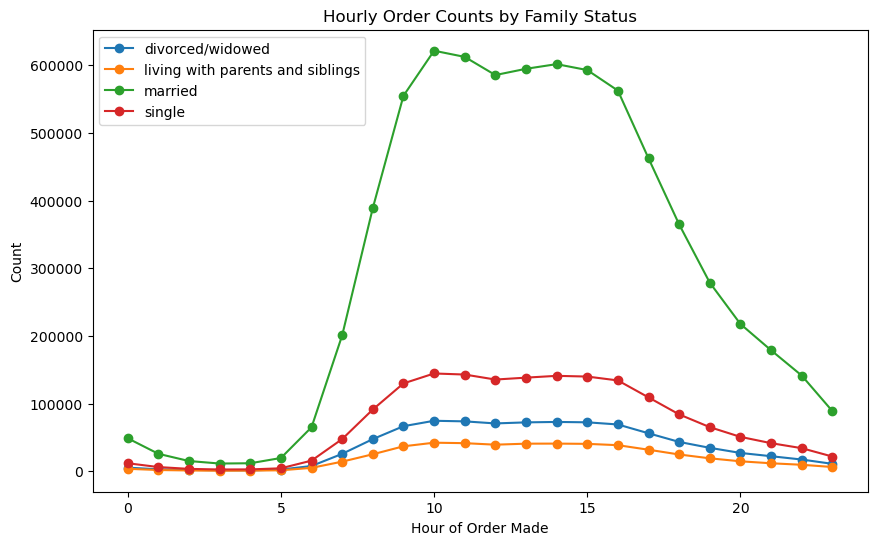

In [31]:
# Creating a line chart for visualization with for loop



fig, ax = plt.subplots(figsize=(10, 6))
for family_status in hourly_order_counts.index:
    ax.plot(hourly_order_counts.columns, hourly_order_counts.loc[family_status], label=family_status, marker='o')
    
### Customizing the chart 

    ax.set_xlabel('Hour of Order Made')
ax.set_ylabel('Count')
ax.set_title('Hourly Order Counts by Family Status')
ax.legend()


save_path = r'C:\Users\wsaha\Documents\Insta basket analysis\04 Analysis\Visualizations'
file_path = os.path.join(save_path, 'Hourly Order Counts by Family Status.png')

# Save the figure directly
fig.savefig(file_path)

In [32]:
## It shows most of orders have been made by married couples and at 6 a.m ordering rate start climbing and reaching peak at 11 a.m then stabalize
## and start decline at 4 p.m

In [33]:
## Checking purchase patterns on different days of week by family status

# Profiling customers on family status and order count by days of week


orders_day_of_week = ords_prods_merge_customer.groupby('fam_status')['orders_day_of_week'].value_counts().unstack()

In [34]:
orders_day_of_week

orders_day_of_week,0,1,2,3,4,5,6
fam_status,,,,,,,
divorced/widowed,167325,153268,114076,105017,102162,116364,122779
living with parents and siblings,93493,86247,64192,58600,57808,65010,68057
married,1383215,1263653,943122,860037,848298,940352,1007819
single,324661,301127,219778,200174,199986,222585,230977


In [35]:
ords_prods_merge_customer['income'] = ords_prods_merge_customer['income'].apply(lambda x: (abs(x) * 2) if x < 0 else x)

C:\Users\wsaha\AppData\Local\Temp\ipykernel_11136\519689750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_merge_customer['income'] = ords_prods_merge_customer['income'].apply(lambda x: (abs(x) * 2) if x < 0 else x)


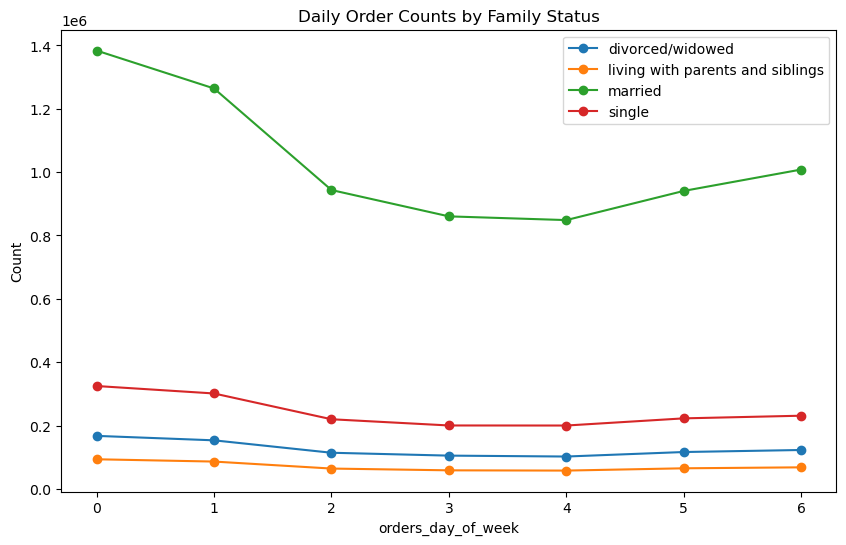

In [36]:
# creating line chart

fig, ax = plt.subplots(figsize=(10, 6))
for family_status in orders_day_of_week.index:
    ax.plot(orders_day_of_week.columns, orders_day_of_week.loc[family_status], label=family_status, marker='o')
    
### Customizing the chart 

    ax.set_xlabel('orders_day_of_week')
ax.set_ylabel('Count')
ax.set_title('Daily Order Counts by Family Status')
ax.legend()

save_path = r'C:\Users\wsaha\Documents\Insta basket analysis\04 Analysis\Visualizations'
file_path = os.path.join(save_path, 'Daily Order Counts by Family Status.png')

# Save the figure directly
fig.savefig(file_path)

In [37]:
## Checking dependants against loyality

# Profiling customers on how dependants have effect on loyality

# Create sub data frame

Dependants_V_Loyalty  = ords_prods_merge_customer.groupby('Number_of_dependants')['spending_flag'].value_counts().unstack(fill_value=0)


In [38]:
Dependants_V_Loyalty

spending_flag,High spender,Low spender
Number_of_dependants,,
0,48824,2531455
1,48178,2524325
2,53536,2525421
3,50687,2537756


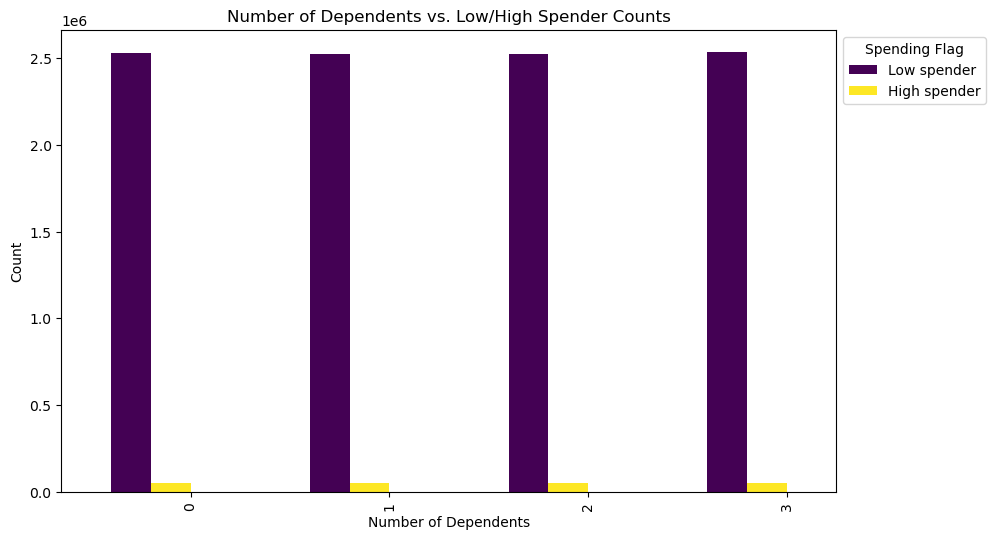

In [39]:
ax = Dependants_V_Loyalty[['Low spender', 'High spender']].plot(kind='bar', figsize=(10, 6), width=0.4, position=1, colormap='viridis')

# Labelling
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Number of Dependents vs. Low/High Spender Counts')
plt.legend(title='Spending Flag', bbox_to_anchor=(1, 1))

save_path = r'C:\Users\wsaha\Documents\Insta basket analysis\04 Analysis\Visualizations'
file_path = os.path.join(save_path, 'High_Low_Spender_Count_by_Dependents.png')

# Save the figure directly
plt.savefig(file_path, bbox_inches='tight')


In [40]:
## It shows that Loyality has no impact from number of dependats in a family



In [41]:
## To further optimize customer profiling to aid next questions , 

#1. Create income flag : High income & low income
# 2. Age flag : Young, Middle age and older age
# Martial status : Married / unmarriesd
# Dependants flag : Has dependant / No dependants


ords_prods_merge_customer.tail()

,order_id,user_id,order_number,orders_day_of_week,hour_of_the _order_made,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,_merge,Region,exclusion_flag
10801592,2685643,36767,4,5,17,22.0,11759,1,0,Organic Simply Naked Pita Chips,...,Male,Virginia,32,1/15/2020,3,married,41456,both,South,No
10801593,1697202,30419,2,5,17,13.0,26604,1,1,Organic Blackberries,...,Female,Nevada,81,4/6/2018,2,married,27006,both,West,No
10801596,1557053,189473,4,5,16,30.0,9397,1,1,Beef Hot Dogs,...,Female,Delaware,53,11/1/2018,0,single,28289,both,South,No
10801598,2903488,166232,9,3,11,14.0,11885,1,1,"Sparkling Water, Bottles",...,Male,Nevada,50,7/10/2018,3,married,45482,both,West,No
10801602,2439880,138941,1,2,10,NaN,4913,1,0,Table Water Crackers,...,Female,Kansas,35,3/5/2018,3,married,41422,both,Midwest,No


In [42]:
ords_prods_merge_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10320182 entries, 0 to 10801602
Data columns (total 34 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   order_id                 object  
 1   user_id                  object  
 2   order_number             int32   
 3   orders_day_of_week       int8    
 4   hour_of_the _order_made  int8    
 5   days_since_prior_order   float64 
 6   product_id               int64   
 7   add_to_cart_order        int16   
 8   reordered                int32   
 9   product_name             object  
 10  aisle_id                 int8    
 11  department_id            int8    
 12  prices                   float64 
 13  merge_indicator          category
 14  price_range_loc          object  
 15  Bussiest_day             object  
 16  busiest_days             object  
 17  busiest_period_of_day    object  
 18  max_order                int64   
 19  loyalty_flag             object  
 20  mean_spend               fl

In [43]:
ords_prods_merge_customer.describe()

,order_number,orders_day_of_week,hour_of_the _order_made,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_spend,median_order_frequency,Age,Number_of_dependants,income
count,1.032018e+07,1.032018e+07,1.032018e+07,9.767097e+06,1.032018e+07,1.032018e+07,1.032018e+07,1.032018e+07,1.032018e+07,1.032018e+07,1.032018e+07,1.032018e+07,1.032018e+07,1.032018e+07,1.032018e+07,1.032018e+07
mean,1.783498e+01,2.741277e+00,1.341011e+01,1.080861e+01,2.559513e+04,8.361796e+00,6.061571e-01,6.451149e+01,9.923957e+00,1.176131e+01,3.443360e+01,1.193644e+01,9.957582e+00,4.946157e+01,1.501499e+00,2.613846e+04
std,1.763531e+01,2.089035e+00,4.250518e+00,8.578951e+00,1.408084e+04,7.133036e+00,4.886007e-01,4.842891e+01,6.283287e+00,4.733537e+02,2.490350e+01,7.956918e+01,6.666882e+00,1.848525e+01,1.118781e+00,1.792294e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00
25%,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354100e+04,3.000000e+00,0.000000e+00,2.400000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.392964e+00,6.000000e+00,3.300000e+01,0.000000e+00,1.161400e+04
50%,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.527200e+04,6.000000e+00,1.000000e+00,7.900000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825000e+00,7.000000e+00,4.900000e+01,2.000000e+00,2.394400e+04
75%,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794000e+04,1.100000e+01,1.000000e+00,1.000000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.249412e+00,1.250000e+01,6.500000e+01,3.000000e+00,3.544200e+04
max,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.410000e+02,1.000000e+00,1.270000e+02,2.100000e+01,9.999900e+04,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,6.553600e+04


In [44]:
## Creating income flag. 

ords_prods_merge_customer['income_flag'] = pd.cut(ords_prods_merge_customer['income'],
                                                       bins=[float('-inf'), 30000, float('inf')],
                                                       labels=['Low Income', 'High Income'])

C:\Users\wsaha\AppData\Local\Temp\ipykernel_11136\1084906908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_merge_customer['income_flag'] = pd.cut(ords_prods_merge_customer['income'],


In [45]:
## Create age flag

ords_prods_merge_customer['age_flag'] = pd.cut(ords_prods_merge_customer['Age'],
                                               bins=[float('-inf'), 25, 50, float('inf')],
                                               labels=['Young', 'Middle Age', 'Old'])

C:\Users\wsaha\AppData\Local\Temp\ipykernel_11136\3919223727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_merge_customer['age_flag'] = pd.cut(ords_prods_merge_customer['Age'],


In [46]:
#### Create new customer profiling collumn

ords_prods_merge_customer['customer_profile'] = (
    ords_prods_merge_customer['age_flag'].astype(str) +
    '_' +
    ords_prods_merge_customer['income_flag'].astype(str) +
    '_' +
    ords_prods_merge_customer['fam_status'].astype(str) +
    '_' +
    ords_prods_merge_customer['Number_of_dependants'].apply(lambda x: 'no_depend' if x == 0 else 'with_depend')
)

C:\Users\wsaha\AppData\Local\Temp\ipykernel_11136\1391871753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_merge_customer['customer_profile'] = (


In [47]:
ords_prods_merge_customer.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_the _order_made,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,Number_of_dependants,fam_status,income,_merge,Region,exclusion_flag,income_flag,age_flag,customer_profile
0,2721012,129081,18,2,15,8.0,21573,5,1,Roasted Pine Nut Hummus,...,8/14/2019,2,married,5227,both,West,No,Low Income,Middle Age,Middle Age_Low Income_married_with_depend
1,2721012,129081,18,2,15,8.0,1117,4,1,Turkey Bacon,...,8/14/2019,2,married,5227,both,West,No,Low Income,Middle Age,Middle Age_Low Income_married_with_depend
2,749483,129081,5,4,12,3.0,28413,4,1,Bunny-Luv Organic Carrots,...,8/14/2019,2,married,5227,both,West,No,Low Income,Middle Age,Middle Age_Low Income_married_with_depend
3,12893,129081,12,0,20,6.0,31759,11,0,Cherrios Honey Nut,...,8/14/2019,2,married,5227,both,West,No,Low Income,Middle Age,Middle Age_Low Income_married_with_depend
4,749483,129081,5,4,12,3.0,42629,10,1,Original Dried Cranberries,...,8/14/2019,2,married,5227,both,West,No,Low Income,Middle Age,Middle Age_Low Income_married_with_depend


In [48]:
# Extracting values on customer profile collumns

customer_profile_counts = ords_prods_merge_customer['customer_profile'].value_counts()

In [49]:
customer_profile_counts

customer_profile
Old_Low Income_married_with_depend                                2169247
Middle Age_Low Income_married_with_depend                         2122815
Old_High Income_married_with_depend                               1558154
Middle Age_High Income_married_with_depend                         920498
Middle Age_Low Income_single_no_depend                             697071
Old_Low Income_divorced/widowed_no_depend                          510453
Young_Low Income_living with parents and siblings_with_depend      381231
Old_High Income_divorced/widowed_no_depend                         370538
Young_Low Income_married_with_depend                               365724
Middle Age_High Income_single_no_depend                            312361
Young_Low Income_single_no_depend                                  243037
Old_Low Income_single_no_depend                                    217265
Old_High Income_single_no_depend                                   154170
Young_High Income_liv

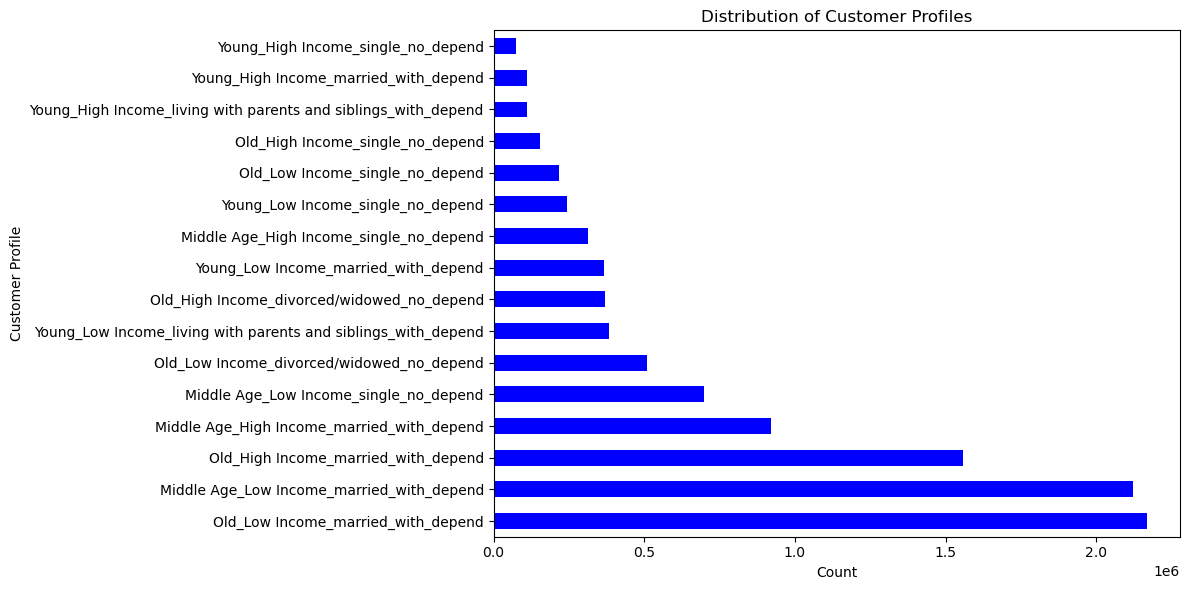

In [67]:
## 6 Create an appropriate visualization to show the distribution of profiles.


customer_profile_counts = ords_prods_merge_customer['customer_profile'].value_counts()

plt.figure(figsize=(12, 6))
customer_profile_counts.plot(kind='barh', color='blue')
plt.xlabel('Count')
plt.ylabel('Customer Profile')
plt.title('Distribution of Customer Profiles')
plt.tight_layout()

save_path = r'C:\Users\wsaha\Documents\Insta basket analysis\04 Analysis\Visualizations'
file_path = os.path.join(save_path, 'destribution_customer_profile.png')

# Save the figure directly
plt.savefig(file_path, bbox_inches='tight')

In [51]:
#Importing Dep and prod and merge them for analysis

Dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [52]:
prod = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products_&_orders_checked.csv'), index_col = False)

In [53]:
Dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [54]:
Dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [55]:
Dep = Dep.rename(columns={Dep.columns[0]: 'department_id'})

In [56]:
Dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [57]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49672 entries, 0 to 49671
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     49672 non-null  int64  
 1   product_id     49672 non-null  int64  
 2   product_name   49672 non-null  object 
 3   aisle_id       49672 non-null  int64  
 4   department_id  49672 non-null  int64  
 5   prices         49672 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [58]:
merged_dep_prod = pd.merge(Dep, prod, on='department_id')

In [59]:
merged_dep_prod.tail()

,department_id,department,Unnamed: 0,product_id,product_name,aisle_id,prices
49667,21,missing,49557,49553,Organic Plain Skyr,100,9.7
49668,21,missing,49579,49575,Chocolate Vanilla Malt Custard,100,12.3
49669,21,missing,49645,49641,"8\"" Pecan Pie",100,6.9
49670,21,missing,49668,49664,Lemon Cayenne Drinking Vinegar,100,13.7
49671,21,missing,49673,49669,K Cup Dark Blend,100,4.7


In [60]:
merged_dep_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49672 entries, 0 to 49671
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department_id  49672 non-null  int64  
 1   department     49672 non-null  object 
 2   Unnamed: 0     49672 non-null  int64  
 3   product_id     49672 non-null  int64  
 4   product_name   49672 non-null  object 
 5   aisle_id       49672 non-null  int64  
 6   prices         49672 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.7+ MB


In [61]:
## Drop unnamed

merged_dep_prod = merged_dep_prod.drop(columns=['Unnamed: 0'])

In [62]:
merged_dep_prod.head()

,department_id,department,product_id,product_name,aisle_id,prices
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,10.5
1,1,frozen,8,Cut Russet Potatoes Steam N' Mash,116,1.1
2,1,frozen,12,Chocolate Fudge Layer Cake,119,9.4
3,1,frozen,18,Pizza for One Suprema Frozen Pizza,79,10.6
4,1,frozen,30,"Three Cheese Ziti, Marinara with Meatballs",38,13.8


In [63]:
department_customer_profile_df = ords_prods_merge_customer[['department_id', 'customer_profile', 'Region']]

In [64]:
department_customer_profile_df

,department_id,customer_profile,Region
0,20,Middle Age_Low Income_married_with_depend,West
1,12,Middle Age_Low Income_married_with_depend,West
2,4,Middle Age_Low Income_married_with_depend,West
3,14,Middle Age_Low Income_married_with_depend,West
4,19,Middle Age_Low Income_married_with_depend,West
...,...,...,...
10801592,19,Middle Age_High Income_married_with_depend,South
10801593,4,Old_Low Income_married_with_depend,West
10801596,12,Old_Low Income_single_no_depend,South
10801598,7,Middle Age_High Income_married_with_depend,West


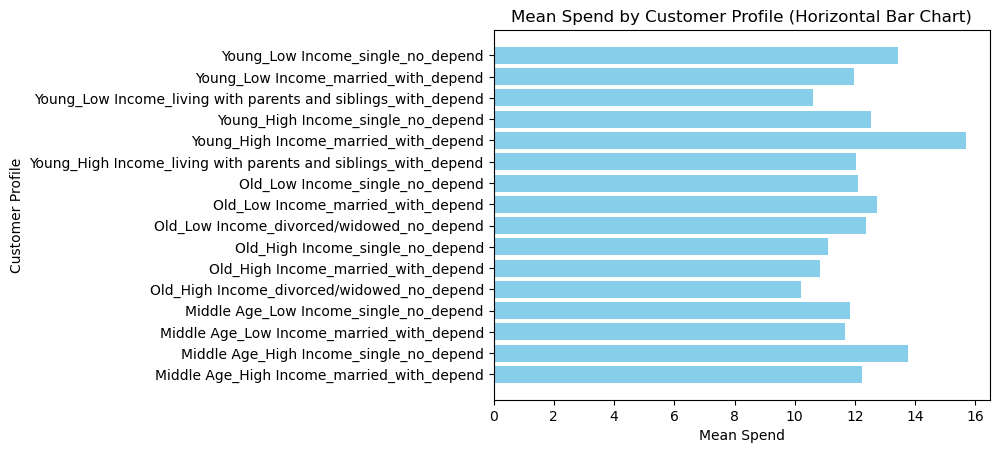

In [68]:
## 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


grouped_data = ords_prods_merge_customer.groupby('customer_profile')['mean_spend'].mean().reset_index()

plt.barh(grouped_data['customer_profile'], grouped_data['mean_spend'], color='skyblue')
plt.xlabel('Mean Spend')
plt.ylabel('Customer Profile')
plt.title('Mean Spend by Customer Profile (Horizontal Bar Chart)')



save_path = r'C:\Users\wsaha\Documents\Insta basket analysis\04 Analysis\Visualizations'
file_path = os.path.join(save_path, 'Profile and mean spend.png')

# Save the figure directly
plt.savefig(file_path, bbox_inches='tight')

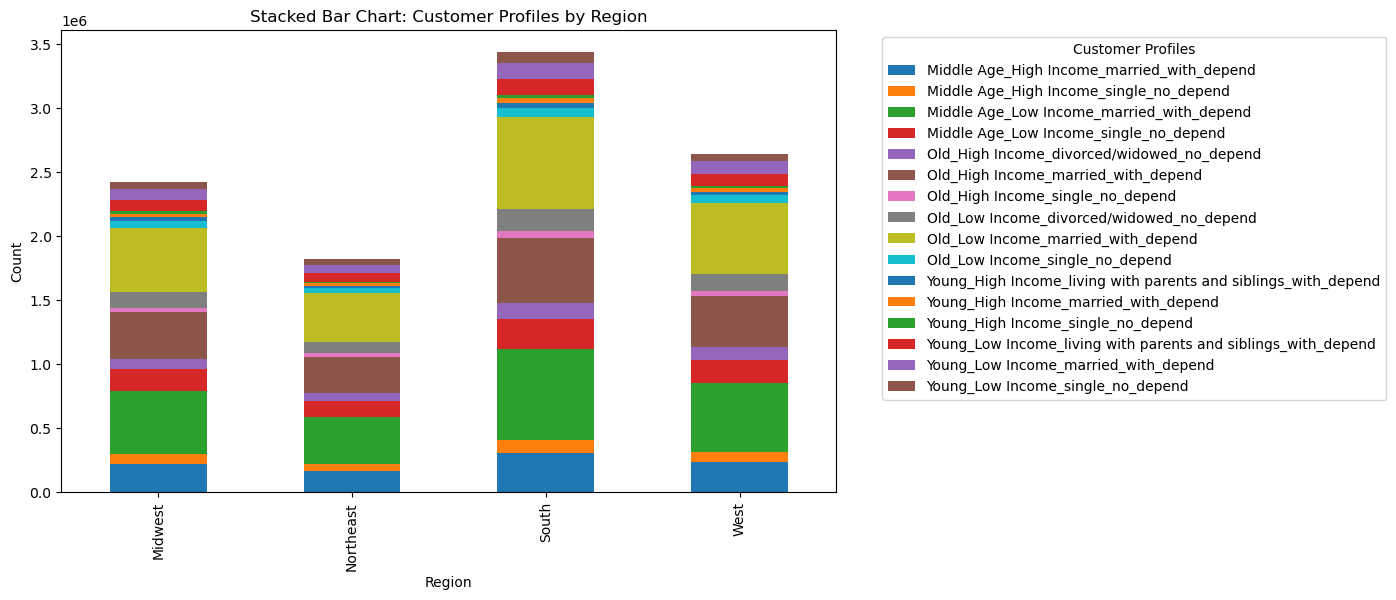

In [69]:
##Compare your customer profiles with regions and departments 

Region_prof = department_customer_profile_df.pivot_table(index='Region', columns='customer_profile', aggfunc='size', fill_value=0)


# stacked bar chart for regions and customer profile
ax = Region_prof.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Stacked Bar Chart: Customer Profiles by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Count')


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Customer Profiles')


save_path = r'C:\Users\wsaha\Documents\Insta basket analysis\04 Analysis\Visualizations'
file_path = os.path.join(save_path, 'Profiles by region.png')

# Save the figure directly
plt.savefig(file_path, bbox_inches='tight')

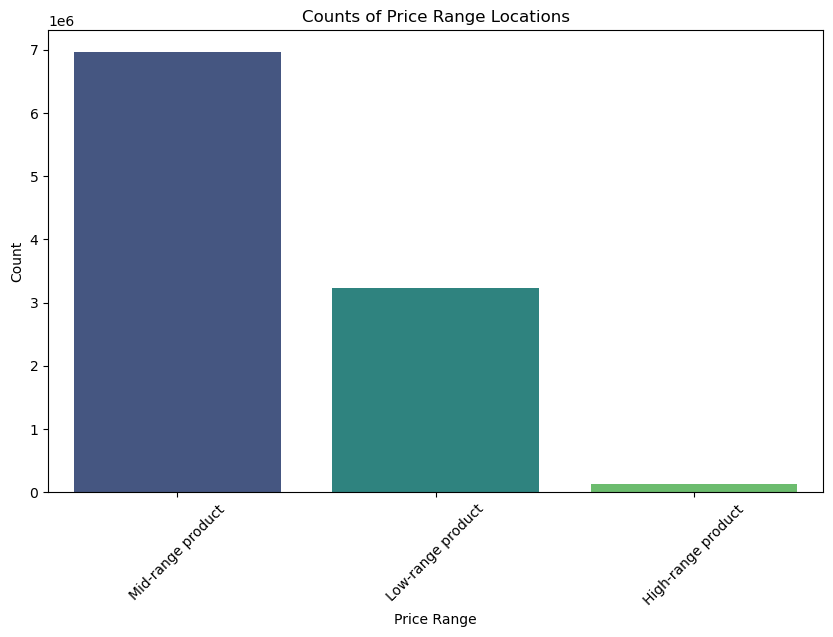

In [71]:
## Prce range purchases

price_range_counts = ords_prods_merge_customer['price_range_loc'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='viridis')
plt.title('Counts of Price Range Locations')
plt.xlabel('Price Range' )
plt.ylabel('Count')
plt.xticks(rotation=45)

save_path = r'C:\Users\wsaha\Documents\Insta basket analysis\04 Analysis\Visualizations'
file_path = os.path.join(save_path, 'Counts price range')

plt.savefig(file_path, bbox_inches='tight')

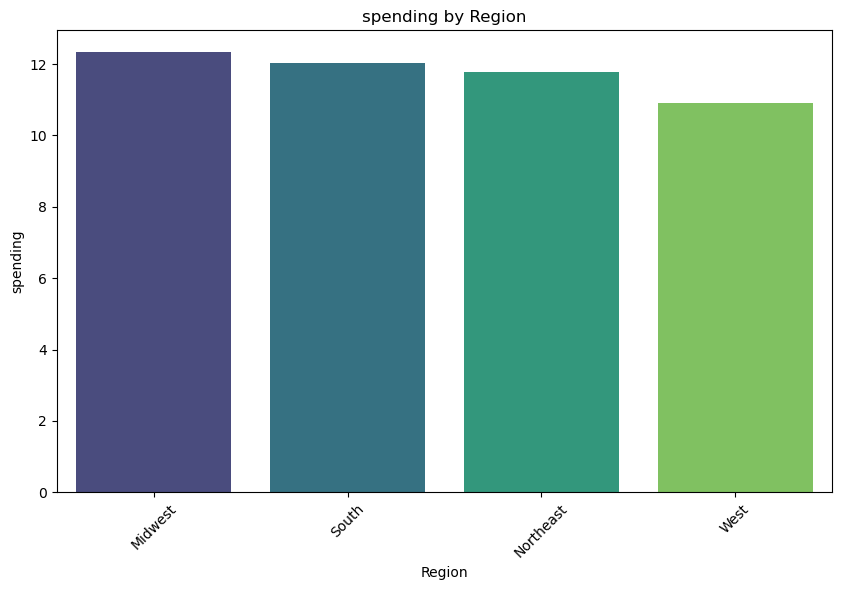

In [75]:
# Purchases by region

price_by_region = ords_prods_merge_customer.groupby('Region')['prices'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=price_by_region.index, y=price_by_region.values, palette='viridis')
plt.title('spending by Region')
plt.xlabel('Region')
plt.ylabel('spending')
plt.xticks(rotation=45) 

save_path = r'C:\Users\wsaha\Documents\Insta basket analysis\04 Analysis\Visualizations'
file_path = os.path.join(save_path, 'Spending by region')

plt.savefig(file_path, bbox_inches='tight')

C:\Users\wsaha\AppData\Local\Temp\ipykernel_11136\908331893.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_age = ords_prods_merge_customer.groupby('age_flag')['prices'].sum().sort_values(ascending=False)
C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


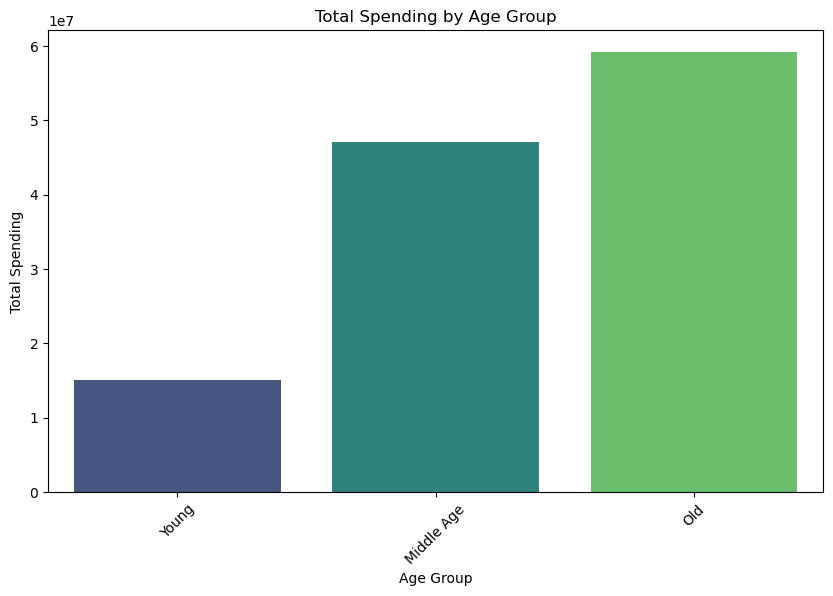

In [77]:
## Spending on age

spending_by_age = ords_prods_merge_customer.groupby('age_flag')['prices'].sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=spending_by_age.index, y=spending_by_age.values, palette='viridis')
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.xticks(rotation=45) 

save_path = r'C:\Users\wsaha\Documents\Insta basket analysis\04 Analysis\Visualizations'
file_path = os.path.join(save_path, 'Spending age')

plt.savefig(file_path, bbox_inches='tight')

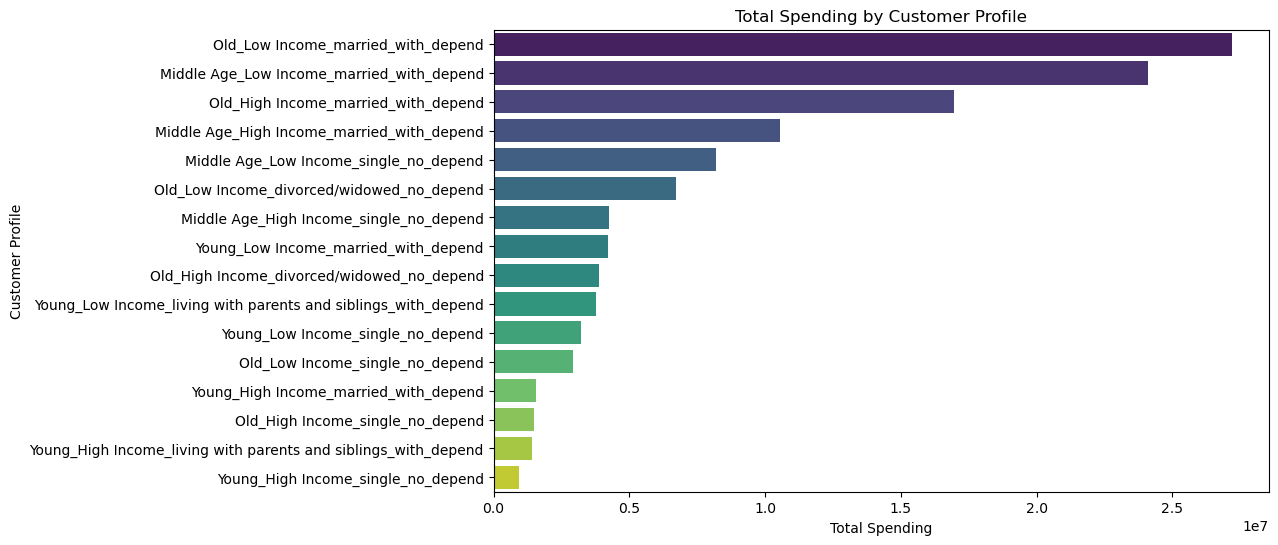

In [79]:
## Spendings on customer profile

total_spending_by_profile = ords_prods_merge_customer.groupby('customer_profile')['prices'].sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=total_spending_by_profile.values, y=total_spending_by_profile.index, palette='viridis')
plt.title('Total Spending by Customer Profile')
plt.xlabel('Total Spending')
plt.ylabel('Customer Profile')

save_path = r'C:\Users\wsaha\Documents\Insta basket analysis\04 Analysis\Visualizations'
file_path = os.path.join(save_path, 'Spending profile')

plt.savefig(file_path, bbox_inches='tight')

In [ ]:
### Like this I could create for each departments how regionwise and customer profile wise sales, demographical destributions take place. 
# However I keep getting memorry dumping when trying to merge tables. So will stop from here 


